# Predictive Modeling for Data Professional Salaries

### About the Dataset

The Kaggle dataset provides a comprehensive overview of individuals' employment details, encompassing job titles, salaries, currencies, locations, and company attributes. Boasting over 7,000 observations across various years, it presents a wealth of data for thorough analysis. Notably, features like experience level, employment type, and company size offer critical insights into the determinants of salaries within the realms of business intelligence, data management, and data science. Through meticulous exploration of this dataset, we aim to unearth meaningful trends, patterns, and correlations. These findings will serve as the bedrock for constructing a robust predictive model, facilitating precise estimation of salaries. Ultimately, our objective is to realize a vision of accurate salary estimation within these professional domains.

### Mission

Our mission is to utilize machine learning techniques to analyze the dataset and build a robust predictive model. By identifying key factors such as job title, experience level, employment type, and company characteristics, we aim to create a tool that provides valuable salary predictions for professionals in these domains. Our ultimate goal is to assist both job seekers and employers in making informed decisions regarding salary negotiations and compensation packages.

### Vision

Our aim is to create a predictive model that precisely forecasts salaries for professionals working in business intelligence, data management, and data science. Leveraging a comprehensive dataset sourced from Kaggle, we seek to extract valuable insights to inform the model's development. By integrating these insights, our goal is to produce accurate salary estimations tailored to individuals within these specialized fields.

In [1]:
#importlibraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('salaries.csv')
data


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Business Intelligence Engineer,202800,USD,202800,US,0,US,L
1,2023,SE,FT,Business Intelligence Engineer,104300,USD,104300,US,0,US,L
2,2023,MI,FT,Data Manager,60000,GBP,73824,GB,0,GB,M
3,2023,MI,FT,Data Manager,55000,GBP,67672,GB,0,GB,M
4,2023,SE,FT,Data Scientist,290000,USD,290000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
7969,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
7970,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
7971,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
7972,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
print('shape of the dataset:{}'.format(data.shape))
print('-'*35)
data.info()

shape of the dataset:(7974, 11)
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7974 entries, 0 to 7973
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           7974 non-null   int64 
 1   experience_level    7974 non-null   object
 2   employment_type     7974 non-null   object
 3   job_title           7974 non-null   object
 4   salary              7974 non-null   int64 
 5   salary_currency     7974 non-null   object
 6   salary_in_usd       7974 non-null   int64 
 7   employee_residence  7974 non-null   object
 8   remote_ratio        7974 non-null   int64 
 9   company_location    7974 non-null   object
 10  company_size        7974 non-null   object
dtypes: int64(4), object(7)
memory usage: 685.4+ KB


In [4]:
# checking for missing values
print(data.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


##### All variable look great

# Exploratory Data Analysis

### Work year

In [5]:
# find the different years of the data
print(data['work_year'].unique())

print("------------------------")

# find which year had the most workers
print(data['work_year'].value_counts())



print("-----------------------")

# percentage wise
print(data['work_year'].value_counts(normalize= True)*100)

[2023 2020 2022 2021]
------------------------
2023    6031
2022    1650
2021     218
2020      75
Name: work_year, dtype: int64
-----------------------
2023    75.633308
2022    20.692250
2021     2.733885
2020     0.940557
Name: work_year, dtype: float64


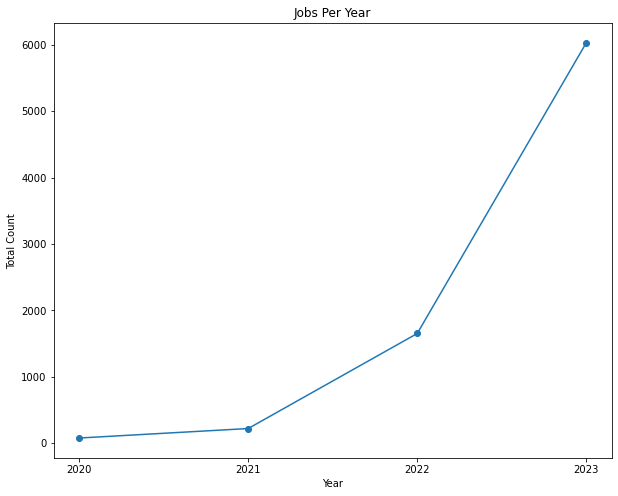

In [6]:
# visualize 
plt.figure(figsize= (10,8))
data['work_year'].value_counts().sort_values().plot(marker = "o")
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.title('Jobs Per Year')
plt.xticks([2020, 2021, 2022,2023],['2020', '2021', '2022', '2023']);
plt.xticks(rotation=0);

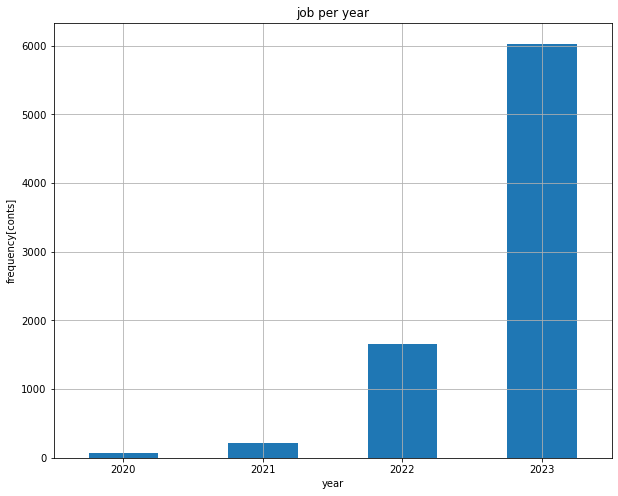

In [7]:
plt.figure(figsize= (10,8))
data['work_year'].value_counts().sort_values().plot(kind="bar")
#label the chart
plt.xlabel("year")
plt.ylabel('frequency[conts]')
plt.title('job per year')
plt.grid()
plt.xticks(rotation=0);

It's plausible that the lower number of employment records in 2020 compared to other years could be attributed to the COVID-19 pandemic. The pandemic had a significant impact on businesses worldwide, leading to disruptions in hiring processes, layoffs, furloughs, and reduced job postings.

In [8]:
# find the percentage increase in each year
pct_ch = (data['work_year'].value_counts().sort_values().pct_change())*100
pct_ch 

2020           NaN
2021    190.666667
2022    656.880734
2023    265.515152
Name: work_year, dtype: float64

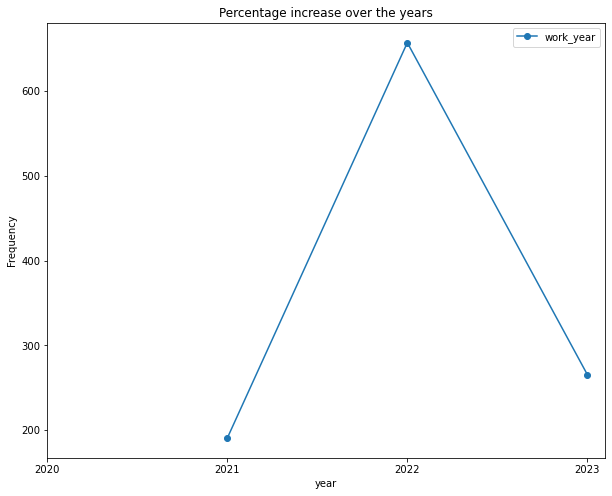

In [9]:
# Line plot of the percentage increase over the years
plt.figure(figsize= (10,8))
pct_ch.plot(marker='o')
plt.xlabel('year')
plt.ylabel('Frequency')
plt.title('Percentage increase over the years')
plt.legend()
plt.xticks([2020, 2021, 2022,2023],['2020', '2021', '2022', '2023']);


In [10]:
min_year_sal =data.groupby('work_year')['salary_in_usd'].min()
max_year_sal = data.groupby('work_year')['salary_in_usd'].max()

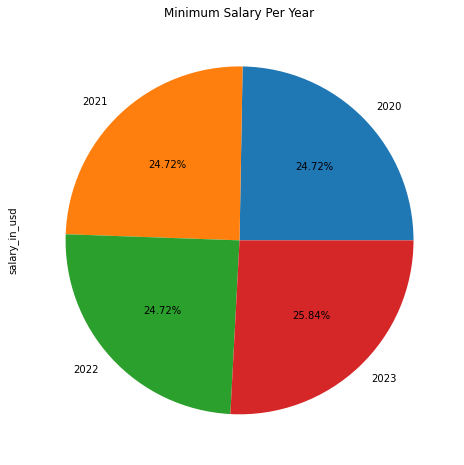

In [11]:
plt.figure(figsize= (10,8))
min_year_sal.plot(kind= 'pie', autopct='%1.2f%%')
plt.title("Minimum Salary Per Year");

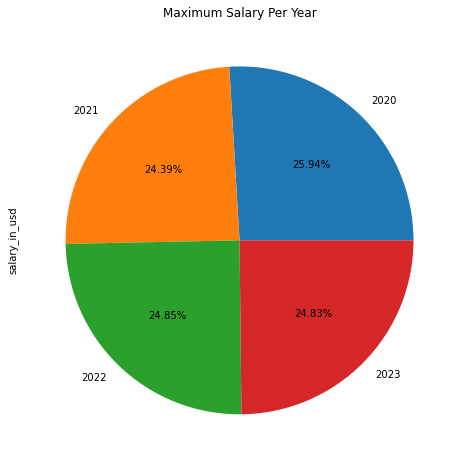

In [12]:
plt.figure(figsize= (10,8))
max_year_sal.plot(kind= 'pie', autopct='%1.2f%%')
plt.title("Maximum Salary Per Year");

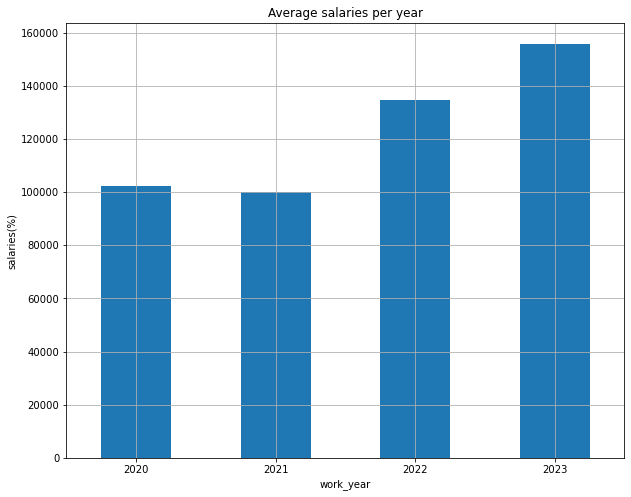

In [13]:
plt.figure(figsize= (10,8))
data.groupby('work_year')['salary_in_usd'].mean().plot.bar()
plt.ylabel('salaries(%)')
plt.title('Average salaries per year')
plt.grid()
plt.xticks(rotation=0);

In `2023`, the average salary in the fields of business intelligence, data management, and data science was notably elevated compared to other years. This suggests that during that period, professionals in these domains enjoyed higher-than-average compensation levels, reflecting potentially favorable economic conditions or increased demand for their specialized skills and expertise.

In [14]:
data.groupby('work_year').aggregate({'salary_in_usd':['mean','median','std','min','max']})

salary_in_usd                                       
                    mean    median           std    min     max
work_year                                                      
2020       102250.866667   79833.0  82722.309481  15000  450000
2021        99922.073394   83872.0  67072.030451  15000  423000
2022       134508.234545  132000.0  57671.158376  15000  430967
2023       155808.402255  148594.0  63656.844429  15680  430640

In [15]:
grouped_data = data.groupby('work_year')['employment_type'].value_counts().unstack()
grouped_data

employment_type,CT,FL,FT,PT
work_year,,,,
2020,3,1,69,2
2021,3,3,208,4
2022,4,4,1636,6
2023,8,3,6019,1


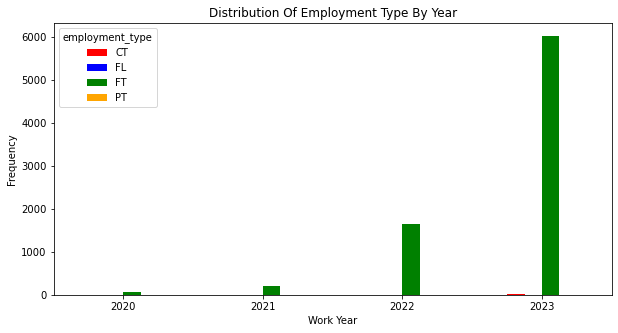

In [16]:
# Set the figure size at the moment you create the plot
fig, ax = plt.subplots(figsize=(10, 5))  

colors = ['red', 'blue', 'green', 'orange']

# Plot directly to the Axes object returned from subplots
data.groupby('work_year')['employment_type'].value_counts().unstack().plot(kind='bar', color=colors, ax=ax)

ax.set_ylabel('Frequency')
ax.set_xlabel("Work Year")
ax.set_title('Distribution Of Employment Type By Year')
ax.set_xticks(range(len(grouped_data.index)))  # set positions for the ticks
ax.set_xticklabels(grouped_data.index, rotation=0)  # set labels from the index

plt.show()  

Full-time employment opportunities predominated in all subsequent years, indicating a prevalent preference among companies for offering full-time positions. This trend underscores the commitment of organizations to providing stable and comprehensive employment arrangements, reflecting their emphasis on long-term workforce engagement and investment.

In [17]:
# unstack the data to enable plot of stacked chart
grouped_data = data.groupby('work_year')['experience_level'].value_counts().unstack()
grouped_data

experience_level,EN,EX,MI,SE
work_year,,,,
2020,21,4,31,19
2021,46,10,87,75
2022,115,41,358,1136
2023,247,190,1070,4524


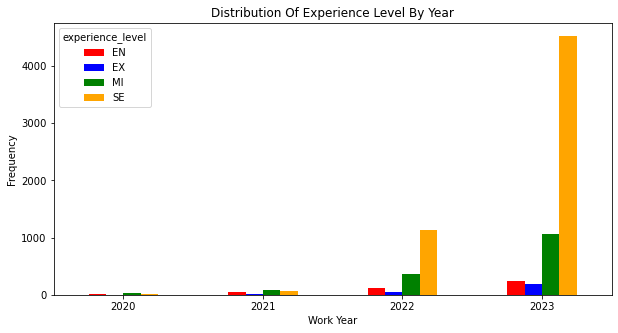

In [18]:
# Set the figure size at the moment you create the plot
fig, ax = plt.subplots(figsize=(10, 5))  

colors = ['red', 'blue', 'green', 'orange']

# Plot directly to the Axes object returned from subplots
data.groupby('work_year')['experience_level'].value_counts().unstack().plot(kind='bar', color=colors, ax=ax)
ax.set_xlabel("Work Year")
ax.set_ylabel('Frequency')
ax.set_title('Distribution Of Experience Level By Year')
ax.set_xticks(range(len(grouped_data.index)))  
ax.set_xticklabels(grouped_data.index, rotation=0)  

plt.show()

In `2020`, `2022`, and `2023`, the Senior Entry experience level predominated, indicating that a significant proportion of individuals employed during these years held senior positions. Conversely, in `2021`, the Mid-Entry experience level was prevalent, suggesting that the workforce composition during that period was characterized by a higher proportion of individuals at mid-level career stages.

In [19]:
# find the yearly percentage increase in each category
data.groupby('work_year')['experience_level'].value_counts().unstack().pct_change() * 100

experience_level,EN,EX,MI,SE
work_year,,,,
2020,NaN,NaN,NaN,NaN
2021,119.047619,150.000000,180.645161,294.736842
2022,150.000000,310.000000,311.494253,1414.666667
2023,114.782609,363.414634,198.882682,298.239437


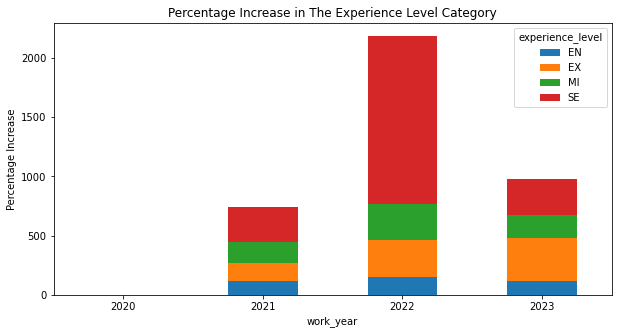

In [20]:
# Create a figure and axis with your desired figure size
fig, ax = plt.subplots(figsize=(10, 5))  # This ensures the figure is the desired size

# Calculate percentage change, multiply by 100 to convert to percentage, and plot
(data.groupby('work_year')['experience_level'].value_counts().unstack().pct_change()*100).plot(kind='bar', stacked=True, ax=ax)

# Setting labels and title
ax.set_ylabel('Percentage Increase')
ax.set_title('Percentage Increase in The Experience Level Category')

# Setting x-ticks rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Show the plot
plt.show()

In [21]:
grouped_data = data.groupby('work_year')['company_size'].value_counts().unstack()
grouped_data

company_size,L,M,S
work_year,,,
2020,34,17,24
2021,124,52,42
2022,191,1410,49
2023,351,5629,51


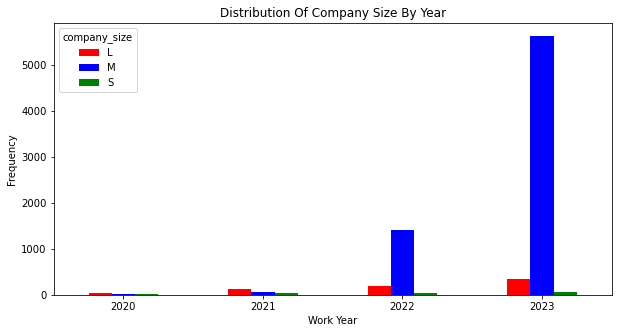

In [22]:
# Set the figure size at the moment you create the plot
fig, ax = plt.subplots(figsize=(10, 5))  

colors = ['red', 'blue', 'green']

# Plot directly to the Axes object returned from subplots
data.groupby('work_year')['company_size'].value_counts().unstack().plot(kind='bar', color=colors, ax=ax)
ax.set_xlabel("Work Year")
ax.set_ylabel('Frequency')
ax.set_title('Distribution Of Company Size By Year')
ax.set_xticks(range(len(grouped_data.index)))  
ax.set_xticklabels(grouped_data.index, rotation=0)  

plt.show()

In `2020` and `2021`, the majority of individuals were employed by large-sized companies, whereas in `2022` and `2023`, a significant portion of the workforce was engaged by middle-sized companies. This pattern suggests a dynamic employment landscape, with shifts in company size preferences over the years.

In [23]:
grouped_data = data.groupby('work_year')['remote_ratio'].value_counts().unstack()
grouped_data

remote_ratio,0,50,100
work_year,,,
2020,18,21,36
2021,29,73,116
2022,709,61,880
2023,3925,61,2045


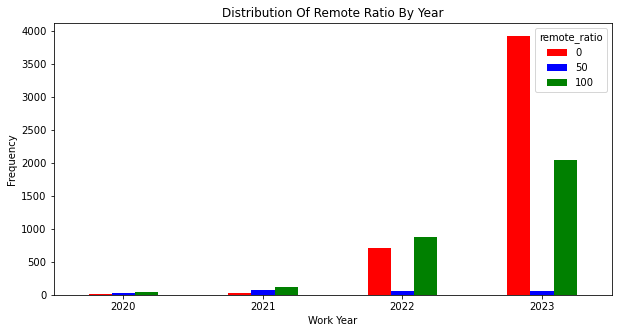

In [24]:
# Set the figure size at the moment you create the plot
fig, ax = plt.subplots(figsize=(10, 5))  

colors = ['red', 'blue', 'green']

# Plot directly to the Axes object returned from subplots
data.groupby('work_year')['remote_ratio'].value_counts().unstack().plot(kind='bar', color=colors, ax=ax)
ax.set_xlabel("Work Year")
ax.set_ylabel('Frequency')
ax.set_title('Distribution Of Remote Ratio By Year')
ax.set_xticks(range(len(grouped_data.index)))  
ax.set_xticklabels(grouped_data.index, rotation=0)  

plt.show()

In `2020`, `2021`, and `2022`, a considerable proportion of individuals worked remotely, indicating a prevalent remote work arrangement. However, in `2023`, there was a notable shift, with the majority of individuals returning to work in the company's offices, signaling a decrease in the remote work ratio during that year.

### Experience Level

In [25]:
# find the different years of the data
print(data['experience_level'].unique())

print("------------------------")

# find which year had the most workers
print(data['experience_level'].value_counts())



print("-----------------------")

# percentage wise
print(data['experience_level'].value_counts(normalize= True)*100)

['SE' 'MI' 'EN' 'EX']
------------------------
SE    5754
MI    1546
EN     429
EX     245
Name: experience_level, dtype: int64
-----------------------
SE    72.159518
MI    19.388011
EN     5.379985
EX     3.072486
Name: experience_level, dtype: float64


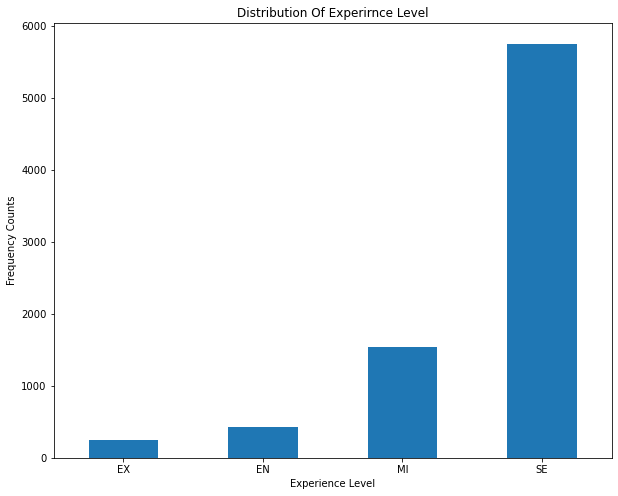

In [26]:
plt.figure(figsize= (10,8))
data['experience_level'].value_counts().sort_values().plot(kind='bar')
plt.xlabel('Experience Level')
plt.ylabel('Frequency Counts')
plt.title('Distribution Of Experirnce Level')
plt.xticks(rotation=0);

In [27]:
min_cs_sal =data.groupby('experience_level')['salary_in_usd'].min()
max_cs_sal = data.groupby('experience_level')['salary_in_usd'].max()

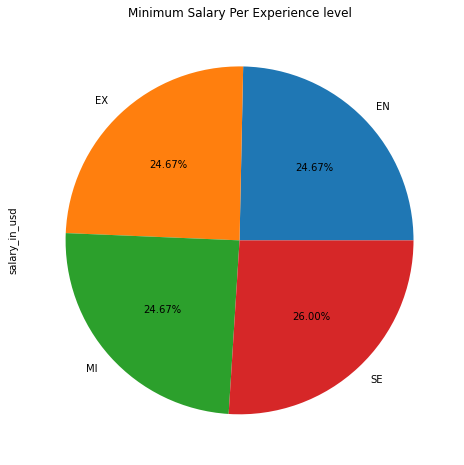

In [28]:
plt.figure(figsize= (10,8))
min_cs_sal.plot(kind= 'pie', autopct='%1.2f%%')
plt.title("Minimum Salary Per Experience level");

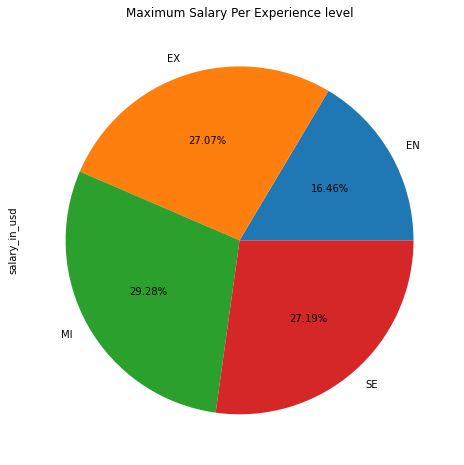

In [29]:
plt.figure(figsize= (10,8))
max_cs_sal.plot(kind= 'pie', autopct='%1.2f%%')
plt.title("Maximum Salary Per Experience level");

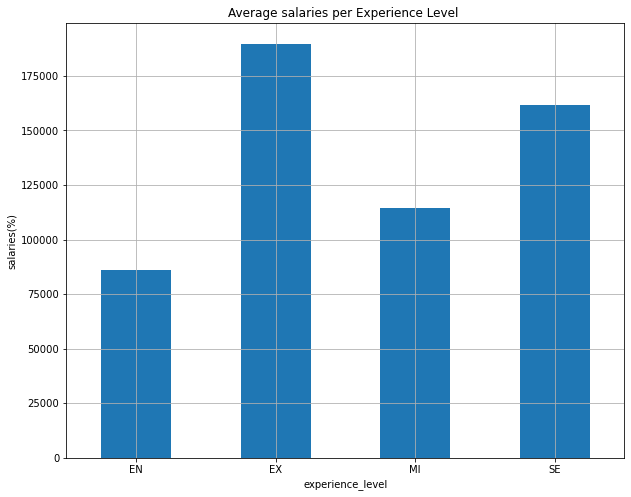

In [30]:
plt.figure(figsize= (10,8))
data.groupby('experience_level')['salary_in_usd'].mean().plot.bar()
plt.ylabel('salaries(%)')
plt.title('Average salaries per Experience Level ')
plt.grid()
plt.xticks(rotation=0);

On average, individuals at the executive level tend to earn higher salaries compared to those at other experience levels. This highlights the premium placed on executive roles in terms of compensation within the dataset.

In [31]:
data.groupby('experience_level').aggregate({'salary_in_usd':['mean','median','std','min','max']})

salary_in_usd                                       
                           mean    median           std    min     max
experience_level                                                      
EN                 86152.589744   76833.0  49247.346729  15000  252990
EX                189666.587755  185000.0  71929.591806  15000  416000
MI                114481.865459  106500.0  56863.352273  15000  450000
SE                161740.380431  154552.5  59759.522574  15809  417937

Among the experience levels, the Mid-Entry level commands the highest salary on average, while the Entry level typically earns the lowest salary. This suggests a distinct hierarchy in salary structures based on experience levels within the dataset.

In [32]:
grouped_data = data.groupby('experience_level')['employment_type'].value_counts().unstack()
grouped_data

employment_type,CT,FL,FT,PT
experience_level,,,,
EN,4.0,2.0,413.0,10.0
EX,1.0,NaN,244.0,NaN
MI,9.0,5.0,1529.0,3.0
SE,4.0,4.0,5746.0,NaN


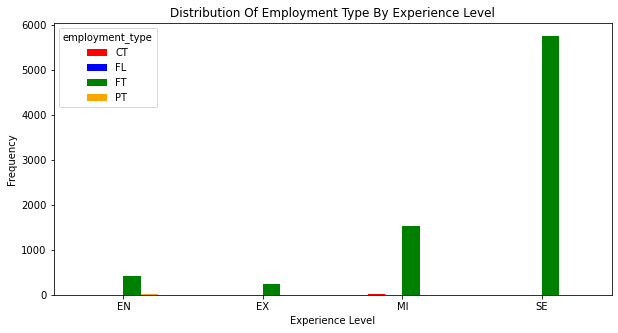

In [33]:
# Set the figure size at the moment you create the plot
fig, ax = plt.subplots(figsize=(10, 5))  

colors = ['red', 'blue', 'green', 'orange']

# Plot directly to the Axes object returned from subplots
data.groupby('experience_level')['employment_type'].value_counts().unstack().plot(kind='bar', color=colors, ax=ax)
ax.set_xlabel("Experience Level")
ax.set_ylabel('Frequency')
ax.set_title('Distribution Of Employment Type By Experience Level')
ax.set_xticks(range(len(grouped_data.index)))  
ax.set_xticklabels(grouped_data.index, rotation=0)  

plt.show()

The majority of individuals across these working experience levels are engaged in full-time employment. This indicates a prevalent preference for full-time work arrangements among individuals with varying levels of experience

In [34]:
grouped_data = data.groupby('experience_level')['company_size'].value_counts().unstack()
grouped_data

company_size,L,M,S
experience_level,,,
EN,106,276,47
EX,17,220,8
MI,172,1313,61
SE,405,5299,50


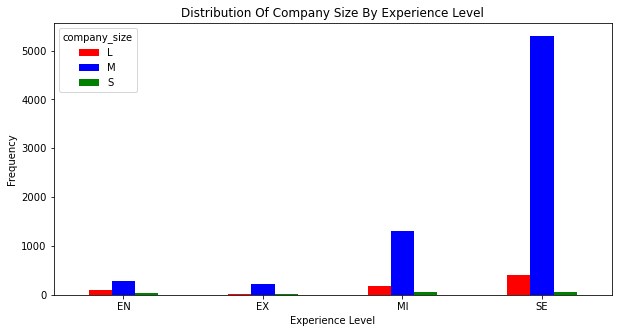

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))  

colors = ['red', 'blue', 'green' ]

# Plot directly to the Axes object returned from subplots
data.groupby('experience_level')['company_size'].value_counts().unstack().plot(kind='bar', color=colors, ax=ax)
ax.set_xlabel("Experience Level")
ax.set_ylabel('Frequency')
ax.set_title('Distribution Of Company Size By Experience Level')
ax.set_xticks(range(len(grouped_data.index)))  
ax.set_xticklabels(grouped_data.index, rotation=0)  

plt.show()

A significant portion of individuals across these working experience levels are employed by middle-sized companies. This suggests a notable concentration of workforce in mid-sized companies across different experience levels.

### Employment Type

In [36]:
# find the different years of the data
print(data['employment_type'].unique())

print("------------------------")

# find which year had the most workers
print(data['employment_type'].value_counts())



print("-----------------------")

# percentage wise
print(data['employment_type'].value_counts(normalize= True)*100)

['FT' 'CT' 'PT' 'FL']
------------------------
FT    7932
CT      18
PT      13
FL      11
Name: employment_type, dtype: int64
-----------------------
FT    99.473288
CT     0.225734
PT     0.163030
FL     0.137948
Name: employment_type, dtype: float64


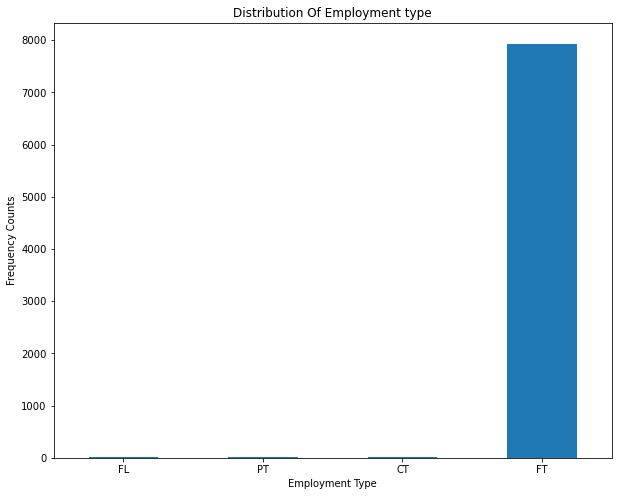

In [37]:
plt.figure(figsize= (10,8))
data['employment_type'].value_counts().sort_values().plot(kind='bar')
plt.xlabel('Employment Type')
plt.ylabel('Frequency Counts')
plt.title('Distribution Of Employment type')
plt.xticks(rotation=0);

In [38]:
min_em_sal =data.groupby('employment_type')['salary_in_usd'].min()
max_em_sal = data.groupby('employment_type')['salary_in_usd'].max()

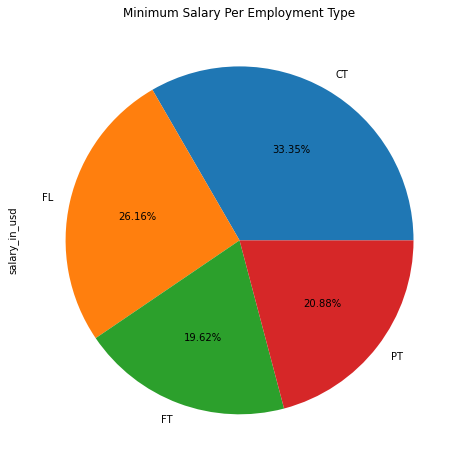

In [39]:
plt.figure(figsize= (10,8))
min_em_sal.plot(kind= 'pie', autopct='%1.2f%%')
plt.title("Minimum Salary Per Employment Type");

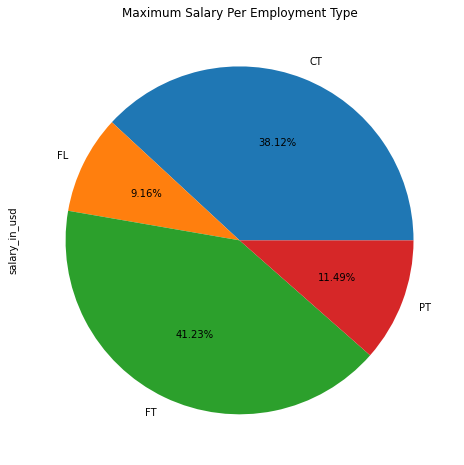

In [40]:
plt.figure(figsize= (10,8))
max_em_sal.plot(kind= 'pie', autopct='%1.2f%%')
plt.title("Maximum Salary Per Employment Type");

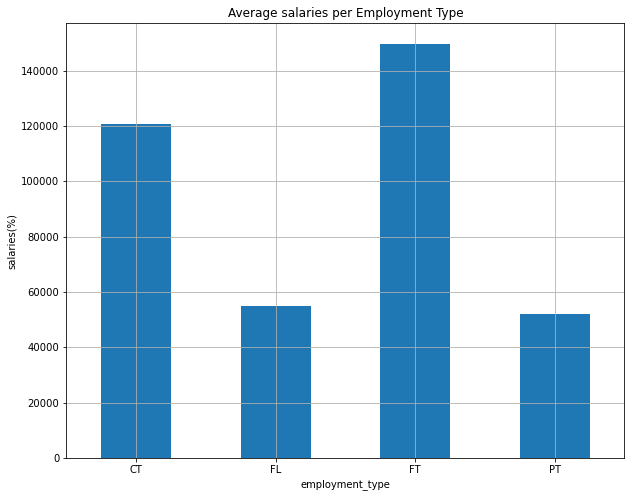

In [41]:
plt.figure(figsize= (10,8))
data.groupby('employment_type')['salary_in_usd'].mean().plot.bar()
plt.ylabel('salaries(%)')
plt.title('Average salaries per Employment Type')
plt.grid()
plt.xticks(rotation=0);

On average, remuneration for full-time positions surpasses that of alternative employment types, reflecting a propensity towards enhanced compensation packages for individuals engaged in full-time roles.

In [42]:
data.groupby('employment_type').aggregate({'salary_in_usd':['mean','median','std','min','max']})

salary_in_usd                                        
                          mean    median            std    min     max
employment_type                                                       
CT               120837.666667   93856.0  109549.051362  25500  416000
FL                54734.363636   50000.0   25394.005916  20000  100000
FT               149724.790847  142940.0   63768.369451  15000  450000
PT                52053.153846   34320.0   38091.986515  15966  125404

The full-time employment category exhibits a comparatively lower minimum salary range, while contract-based positions demonstrate a higher minimum salary threshold relative to other employment types. Conversely, full-time roles showcase a higher maximum salary range compared to alternative employment categories, whereas freelance engagements tend to feature a lower maximum salary range in comparison.

In [43]:
grouped_data = data.groupby('employment_type')['company_size'].value_counts().unstack()
grouped_data

company_size,L,M,S
employment_type,,,
CT,5,6,7
FL,1,5,5
FT,689,7094,149
PT,5,3,5


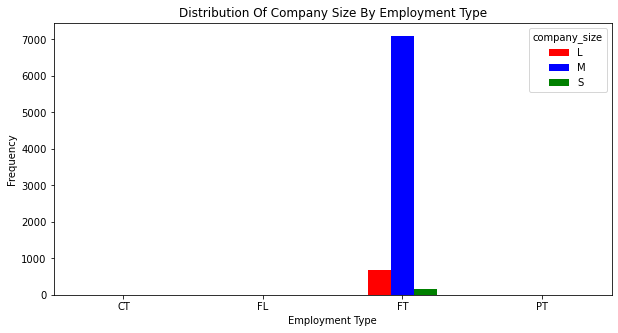

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))  

colors = ['red', 'blue', 'green' ]

# Plot directly to the Axes object returned from subplots
data.groupby('employment_type')['company_size'].value_counts().unstack().plot(kind='bar', color=colors, ax=ax)
ax.set_xlabel("Employment Type")
ax.set_ylabel('Frequency')
ax.set_title('Distribution Of Company Size By Employment Type')
ax.set_xticks(range(len(grouped_data.index)))  
ax.set_xticklabels(grouped_data.index, rotation=0)  

plt.show()

The bulk of contract-based positions are situated within small companies.

Freelance roles are primarily found in small and mid-sized companies.

Full-time employment is predominantly concentrated within mid-sized companies.

Part-time positions are commonly distributed among both small and large companies.


### Company Size

In [45]:
# find the different years of the data
print(data['company_size'].unique())

print("------------------------")

# find which year had the most workers
print(data['company_size'].value_counts())



print("-----------------------")

# percentage wise
print(data['company_size'].value_counts(normalize= True)*100)

['L' 'M' 'S']
------------------------
M    7108
L     700
S     166
Name: company_size, dtype: int64
-----------------------
M    89.139704
L     8.778530
S     2.081766
Name: company_size, dtype: float64


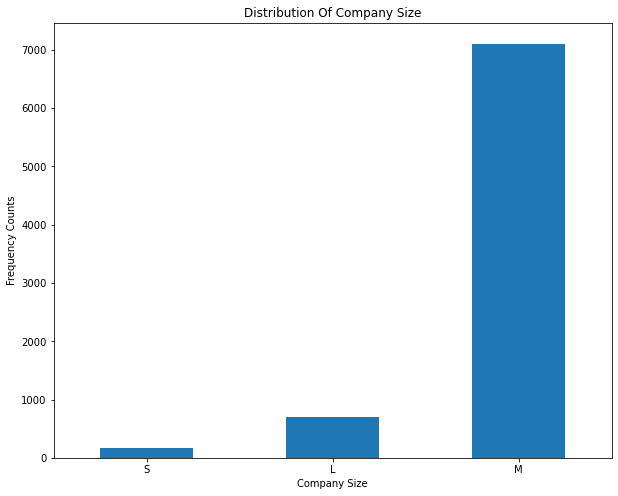

In [46]:
plt.figure(figsize= (10,8))
data['company_size'].value_counts().sort_values().plot(kind='bar')
plt.xlabel('Company Size')
plt.ylabel('Frequency Counts')
plt.title('Distribution Of Company Size')
plt.xticks(rotation=0);

In [47]:
min_cm_sal =data.groupby('company_size')['salary_in_usd'].min()
max_cm_sal = data.groupby('company_size')['salary_in_usd'].max()

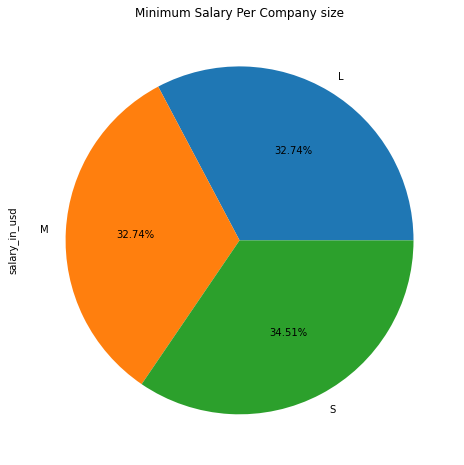

In [48]:
plt.figure(figsize= (10,8))
min_cm_sal.plot(kind= 'pie', autopct='%1.2f%%')
plt.title("Minimum Salary Per Company size");

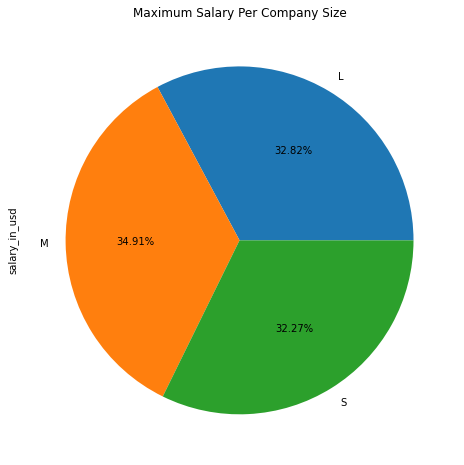

In [49]:
plt.figure(figsize= (10,8))
max_cm_sal.plot(kind= 'pie', autopct='%1.2f%%')
plt.title("Maximum Salary Per Company Size");

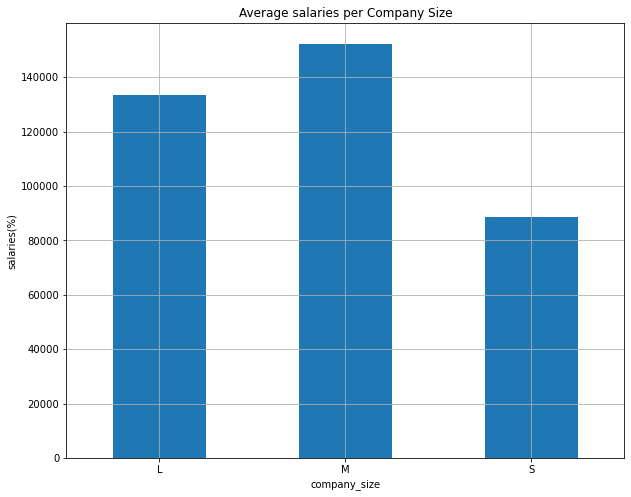

In [50]:
plt.figure(figsize= (10,8))
data.groupby('company_size')['salary_in_usd'].mean().plot.bar()
plt.ylabel('salaries(%)')
plt.title('Average salaries per Company Size')
plt.grid()
plt.xticks(rotation=0);

On average, mid-sized companies offer competitive compensation packages.

In [51]:
data.groupby('company_size').aggregate({'salary_in_usd':['mean','median','std','min','max']})

salary_in_usd                                       
                       mean    median           std    min     max
company_size                                                      
L             133621.020000  130000.0  76011.232393  15000  423000
M             152336.441334  145000.0  61915.061929  15000  450000
S              88727.403614   75324.0  59597.479917  15809  416000

### Remote Ratio

In [52]:
# find the different years of the data
print(data['remote_ratio'].unique())

print("------------------------")

# find which year had the most workers
print(data['remote_ratio'].value_counts())



print("-----------------------")

# percentage wise
print(data['remote_ratio'].value_counts(normalize= True)*100)

[  0 100  50]
------------------------
0      4681
100    3077
50      216
Name: remote_ratio, dtype: int64
-----------------------
0      58.703286
100    38.587911
50      2.708804
Name: remote_ratio, dtype: float64


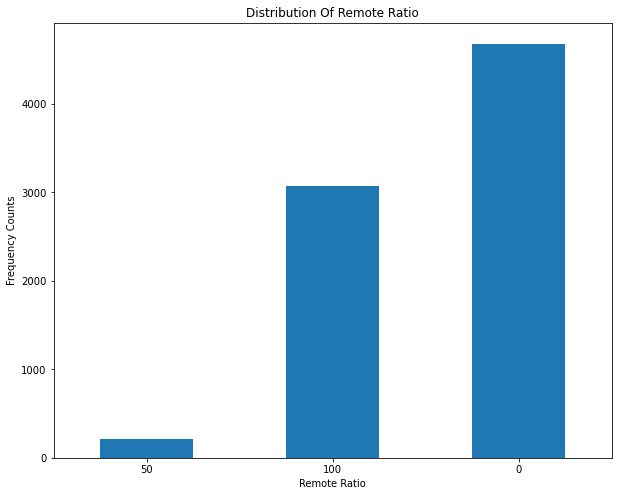

In [53]:
plt.figure(figsize= (10,8))
data['remote_ratio'].value_counts().sort_values().plot(kind='bar')
plt.xlabel('Remote Ratio')
plt.ylabel('Frequency Counts')
plt.title('Distribution Of Remote Ratio')
plt.xticks(rotation=0);

In [54]:
min_rr_sal =data.groupby('remote_ratio')['salary_in_usd'].min()
max_rr_sal = data.groupby('remote_ratio')['salary_in_usd'].max()

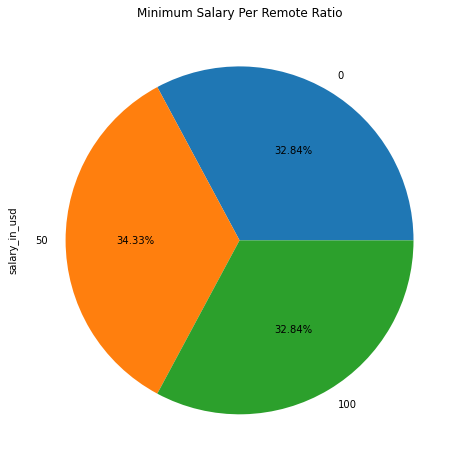

In [55]:
plt.figure(figsize= (10,8))
min_rr_sal.plot(kind= 'pie', autopct='%1.2f%%')
plt.title("Minimum Salary Per Remote Ratio");

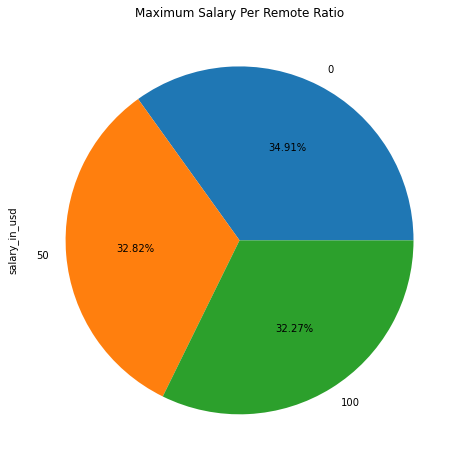

In [56]:
plt.figure(figsize= (10,8))
max_rr_sal.plot(kind= 'pie', autopct='%1.2f%%')
plt.title("Maximum Salary Per Remote Ratio");

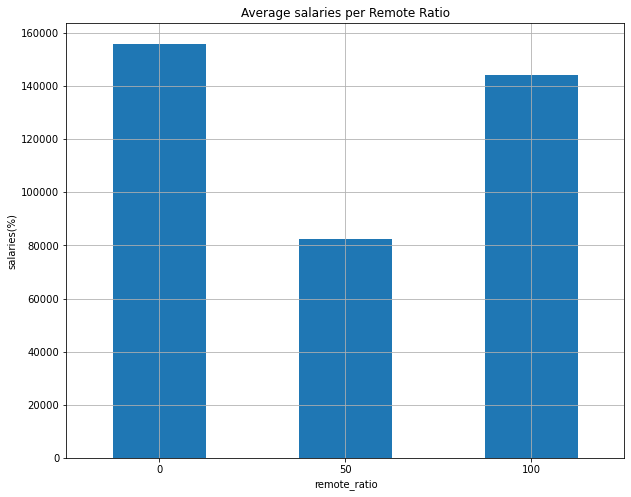

In [57]:
plt.figure(figsize= (10,8))
data.groupby('remote_ratio')['salary_in_usd'].mean().plot.bar()
plt.ylabel('salaries(%)')
plt.title('Average salaries per Remote Ratio')
plt.grid()
plt.xticks(rotation=0);

Individuals tend to earn higher average salaries when working at the company's offices, relative to their remote work ratio

In [58]:
data.groupby('remote_ratio').aggregate({'salary_in_usd':['mean','median','std','min','max']})

salary_in_usd                                       
                       mean    median           std    min     max
remote_ratio                                                      
0             155943.030549  145500.0  64246.838088  15000  450000
50             82561.337963   65844.0  61258.698630  15680  423000
100           144058.600260  140358.0  60713.232469  15000  416000

In [59]:
grouped_data = data.groupby('remote_ratio')['employment_type'].value_counts().unstack()
grouped_data

employment_type,CT,FL,FT,PT
remote_ratio,,,,
0,1.0,2.0,4678.0,NaN
50,2.0,3.0,205.0,6.0
100,15.0,6.0,3049.0,7.0


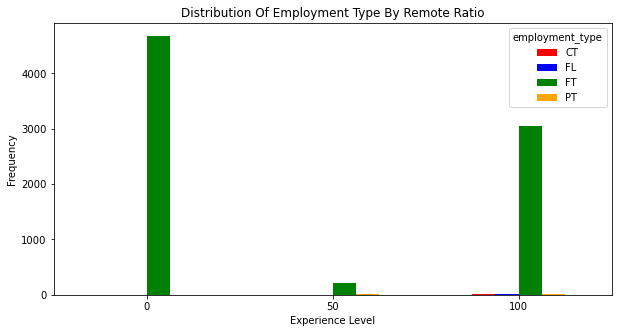

In [60]:
# Set the figure size at the moment you create the plot
fig, ax = plt.subplots(figsize=(10, 5))  

colors = ['red', 'blue', 'green', 'orange']

# Plot directly to the Axes object returned from subplots
data.groupby('remote_ratio')['employment_type'].value_counts().unstack().plot(kind='bar', color=colors, ax=ax)
ax.set_xlabel("Experience Level")
ax.set_ylabel('Frequency')
ax.set_title('Distribution Of Employment Type By Remote Ratio')
ax.set_xticks(range(len(grouped_data.index)))  
ax.set_xticklabels(grouped_data.index, rotation=0)  

plt.show()

The predominant work arrangement, whether it be fully remote, fully office-based, or a hybrid of both, is full-time employment for most individuals.

In [61]:
grouped_data = data.groupby('remote_ratio')['experience_level'].value_counts().unstack()
grouped_data

experience_level,EN,EX,MI,SE
remote_ratio,,,,
0,183,130,893,3475
50,69,8,85,54
100,177,107,568,2225


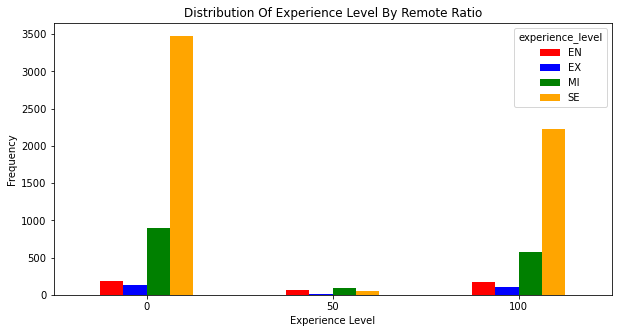

In [62]:
# Set the figure size at the moment you create the plot
fig, ax = plt.subplots(figsize=(10, 5))  

colors = ['red', 'blue', 'green', 'orange']

# Plot directly to the Axes object returned from subplots
data.groupby('remote_ratio')['experience_level'].value_counts().unstack().plot(kind='bar', color=colors, ax=ax)
ax.set_xlabel("Experience Level")
ax.set_ylabel('Frequency')
ax.set_title('Distribution Of Experience Level By Remote Ratio')
ax.set_xticks(range(len(grouped_data.index)))  
ax.set_xticklabels(grouped_data.index, rotation=0)  

plt.show()

The majority of individuals at the senior entry level engage in a combination of office-based and remote work arrangements.


In [63]:
grouped_data = data.groupby('remote_ratio')['company_size'].value_counts().unstack()
grouped_data

company_size,L,M,S
remote_ratio,,,
0,311,4340,30
50,129,51,36
100,260,2717,100


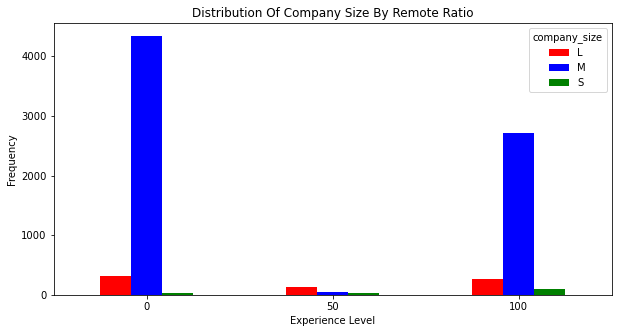

In [64]:
# Set the figure size at the moment you create the plot
fig, ax = plt.subplots(figsize=(10, 5))  

colors = ['red', 'blue', 'green', 'orange']

# Plot directly to the Axes object returned from subplots
data.groupby('remote_ratio')['company_size'].value_counts().unstack().plot(kind='bar', color=colors, ax=ax)
ax.set_xlabel("Experience Level")
ax.set_ylabel('Frequency')
ax.set_title('Distribution Of Company Size By Remote Ratio')
ax.set_xticks(range(len(grouped_data.index)))  
ax.set_xticklabels(grouped_data.index, rotation=0)  

plt.show()

A significant proportion of individuals who work either in the office, at home, or in a hybrid arrangement are employed by mid-sized companies.

### Company Location

In [65]:
#company location
print(f' We have {data.company_location.nunique()} company locations ')
data.company_location.unique()

 We have 73 company locations 


array(['US', 'GB', 'CA', 'GR', 'CO', 'PT', 'UA', 'FR', 'NL', 'IN', 'ES',
       'LV', 'MU', 'DE', 'PL', 'RU', 'IT', 'KR', 'EE', 'CZ', 'CH', 'BR',
       'QA', 'KE', 'DK', 'GH', 'SE', 'PH', 'AU', 'TR', 'AD', 'EC', 'MX',
       'IL', 'NG', 'SA', 'NO', 'AR', 'JP', 'ZA', 'HK', 'CF', 'FI', 'IE',
       'SG', 'SI', 'TH', 'HR', 'AM', 'BA', 'RO', 'PK', 'LT', 'IR', 'BS',
       'HU', 'AT', 'PR', 'AS', 'BE', 'ID', 'EG', 'AE', 'MY', 'HN', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'LU', 'MT'], dtype=object)

In [66]:
data['company_location'].value_counts().head(10)

US    6817
GB     397
CA     181
ES     106
DE      72
IN      50
FR      47
AU      23
PT      21
NL      18
Name: company_location, dtype: int64

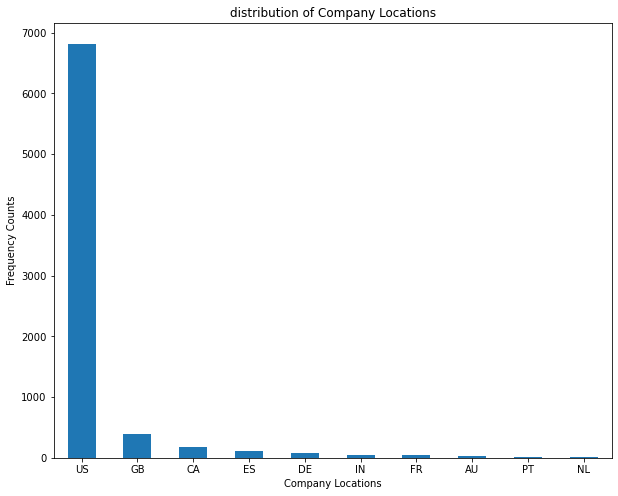

In [67]:
plt.figure(figsize= (10,8))
data['company_location'].value_counts().head(10).plot.bar()
plt.xlabel("Company Locations")
plt.ylabel('Frequency Counts')
plt.title('distribution of Company Locations')
plt.xticks(rotation=0);

Most of the individuals work in the US

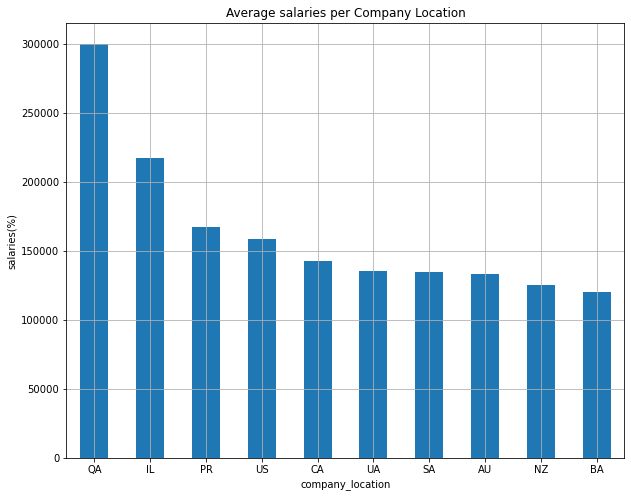

In [68]:
plt.figure(figsize= (10,8))
data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('salaries(%)')
plt.title('Average salaries per Company Location')
plt.grid()
plt.xticks(rotation=0);

In [69]:
import pycountry as p
p.countries.get(alpha_2 = 'QA')

Country(alpha_2='QA', alpha_3='QAT', flag='🇶🇦', name='Qatar', numeric='634', official_name='State of Qatar')

On average, companies in Qatar offer notably higher compensation compared to companies in other countries.

### Job title

In [70]:
#company location
print(f' We have {data.job_title.nunique()} jobs in the Dataset ')
data.job_title.unique()

 We have 118 jobs in the Dataset 


array(['Business Intelligence Engineer', 'Data Manager', 'Data Scientist',
       'Machine Learning Scientist', 'Analytics Engineer',
       'Data Architect', 'Machine Learning Engineer', 'Data Engineer',
       'Data Analyst', 'Research Scientist', 'Computer Vision Engineer',
       'Applied Scientist', 'Data Visualization Specialist',
       'ML Engineer', 'Research Engineer', 'Data Science Manager',
       'BI Analyst', 'Research Analyst', 'Insight Analyst',
       'Business Intelligence Analyst', 'AI Engineer',
       'Data Integration Specialist', 'Data Science Practitioner',
       'Data Science Engineer', 'Director of Data Science',
       'Data Specialist', 'Data Visualization Engineer', 'Data Modeler',
       'Head of Data', 'ETL Developer', 'BI Developer',
       'Data Analytics Manager', 'Azure Data Engineer',
       'Decision Scientist', 'Machine Learning Infrastructure Engineer',
       'Data Lead', 'Data Developer', 'AI Developer',
       'Principal Data Scientist', 'Data

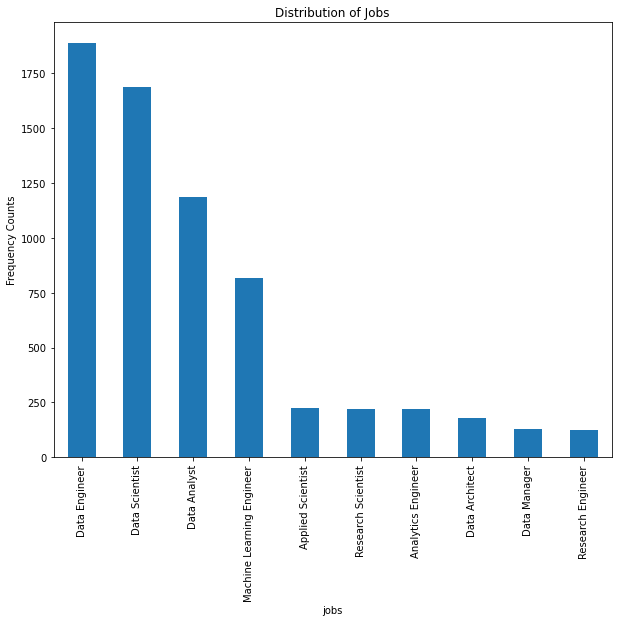

In [71]:
plt.figure(figsize= (10,8))
data['job_title'].value_counts().head(10).plot.bar()
plt.xlabel("jobs")
plt.ylabel('Frequency Counts')
plt.title('Distribution of Jobs')
plt.xticks(rotation=90);

Data Engineer is the most prevalent job title in the dataset.


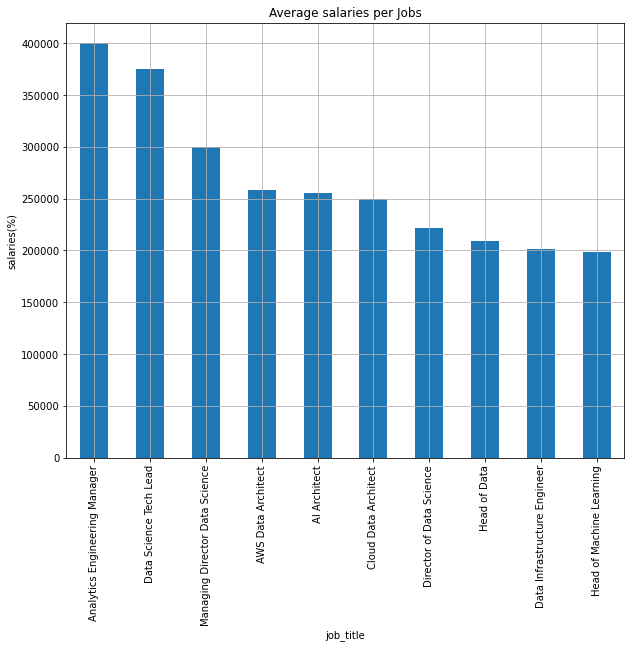

In [72]:
plt.figure(figsize= (10,8))
data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('salaries(%)')
plt.title('Average salaries per Jobs')
plt.grid()
plt.xticks(rotation=90);

Analyst Engineering Manager positions tend to have higher average salaries compared to other roles within the dataset.

### Salary

In [73]:
# find minimum salary
print('The minimum Salary:', data['salary_in_usd'].min())
print('The maximum Salary:', data['salary_in_usd'].max())
print('The mean Salary:', data['salary_in_usd'].mean())
print("The median salary is:", data['salary_in_usd'].mean())

The minimum Salary: 15000
The maximum Salary: 450000
The mean Salary: 149369.3112616002
The median salary is: 149369.3112616002


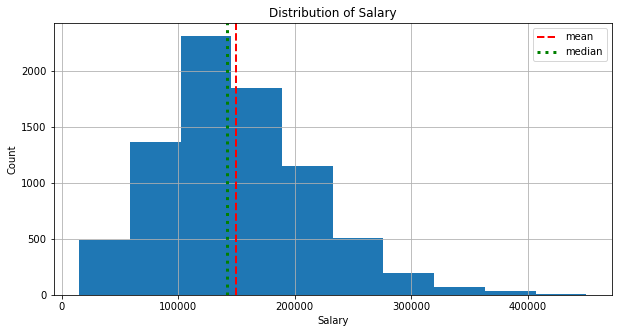

In [74]:
# visualize the salary for better interpretion
mean = data['salary_in_usd'].mean()
median = data['salary_in_usd'].median()


plt.figure(figsize= (10,5))
data['salary_in_usd'].hist()
plt.axvline(mean, linestyle='--', linewidth= 2, color= 'r', label = 'mean')
plt.axvline(median, linestyle=':', linewidth= 3, color= 'g', label = "median")
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Distribution of Salary')
plt.legend();

##### We can notice some skewness in our chart. This skewness means that there is some outliers in our `salary` variable

# Data Preprocessing

In [75]:
data["job_title"].value_counts().head(40)

Data Engineer                               1888
Data Scientist                              1688
Data Analyst                                1188
Machine Learning Engineer                    816
Applied Scientist                            226
Research Scientist                           219
Analytics Engineer                           218
Data Architect                               179
Data Manager                                 128
Research Engineer                            123
Business Intelligence Engineer               102
Data Science Manager                          90
ML Engineer                                   89
Machine Learning Scientist                    68
BI Developer                                  42
Data Analytics Manager                        39
Decision Scientist                            36
Data Specialist                               36
Data Science Consultant                       34
Business Intelligence Analyst                 32
Head of Data        

In [76]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = "Other"
    return categorical_map        

In [77]:
job_map = shorten_categories(data['job_title'].value_counts(), 20)
data['job_title'] = data['job_title'].map(job_map)
data['job_title'].value_counts()

Data Engineer                               1888
Data Scientist                              1688
Data Analyst                                1188
Machine Learning Engineer                    816
Other                                        492
Applied Scientist                            226
Research Scientist                           219
Analytics Engineer                           218
Data Architect                               179
Data Manager                                 128
Research Engineer                            123
Business Intelligence Engineer               102
Data Science Manager                          90
ML Engineer                                   89
Machine Learning Scientist                    68
BI Developer                                  42
Data Analytics Manager                        39
Data Specialist                               36
Decision Scientist                            36
Data Science Consultant                       34
Business Intelligenc

<div style= "background-color: #fbceb1; padding: 10px;">
    <strong>Note!!!</strong>
    <br>
    Only job titles with value counts exceeding 20 were considered for model building to mitigate the risk of overfitting, as job titles with lower counts may introduce unnecessary complexity and potentially compromise the model's performance. 
     </div>

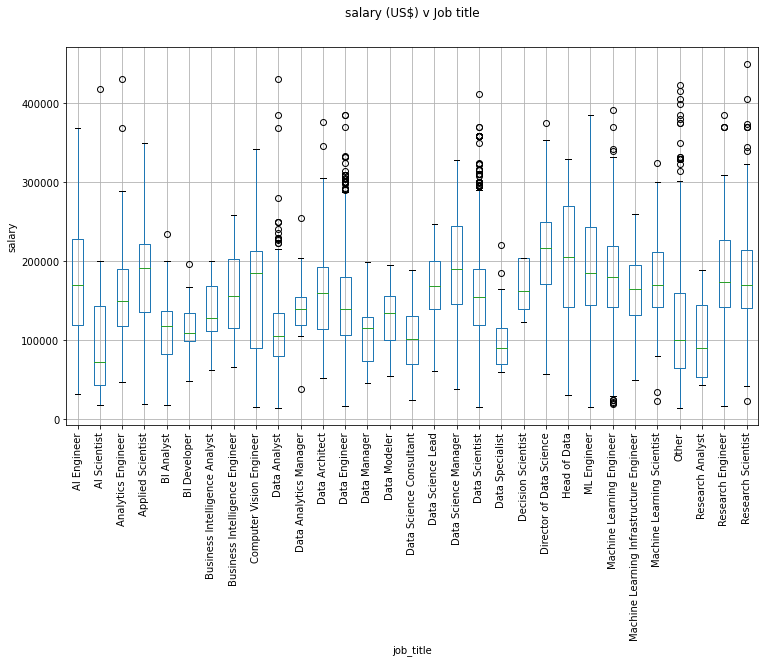

In [78]:
fig, ax = plt.subplots(1,1, figsize= (12, 7))
data.boxplot("salary_in_usd", "job_title", ax = ax)
plt.suptitle("salary (US$) v Job title")
plt.title('')
plt.ylabel("salary")
plt.xticks(rotation =90)
plt.show()

<div style= "background-color: #fbceb1; padding: 10px;">
    <strong>Note!!!</strong>
    <br>
    Let's build our model using data where the salary falls within the range of 10,000 and 360,000, excluding outliers beyond this range.
    </div>

In [79]:
data=data[data['salary_in_usd'] <= 360000]
data=data[data['salary_in_usd'] >= 10000 ]
data=data[data['job_title'] != 'Other']

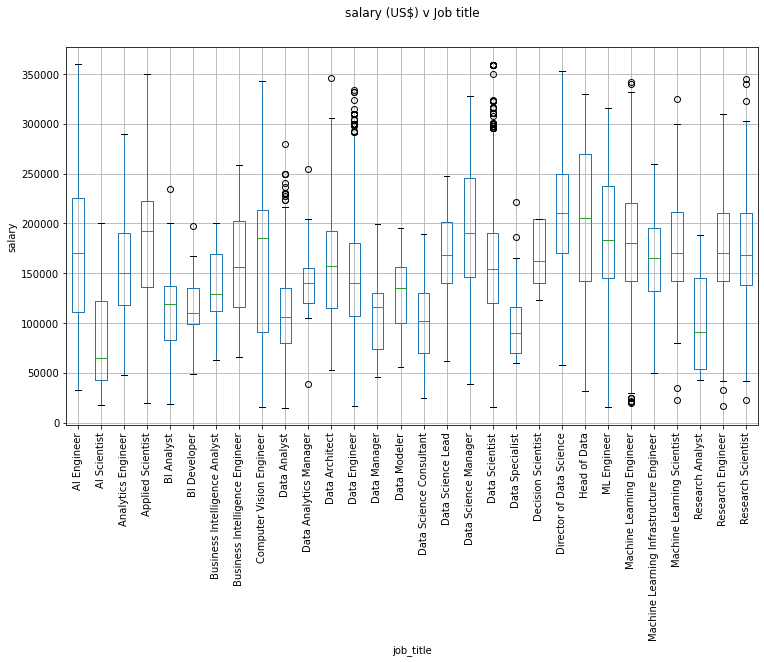

In [80]:
fig, ax = plt.subplots(1,1, figsize= (12, 7))
data.boxplot("salary_in_usd", "job_title", ax = ax)
plt.suptitle("salary (US$) v Job title")
plt.title('')
plt.ylabel("salary")
plt.xticks(rotation =90)
plt.show()

In [81]:
from sklearn.preprocessing import LabelEncoder
le_expl=LabelEncoder()
data["experience_level"] = le_expl.fit_transform(data["experience_level"])
data["experience_level"].unique()

array([3, 2, 0, 1])

In [82]:
le_empt=LabelEncoder()
data["employment_type"] = le_empt.fit_transform(data["employment_type"])
data["employment_type"].unique()

array([2, 0, 3, 1])

In [83]:
le_compz=LabelEncoder()
data["company_size"] = le_compz.fit_transform(data["company_size"])
data["company_size"].unique()

array([0, 1, 2])

In [84]:
le_jobtitle=LabelEncoder()
data["job_title"] = le_jobtitle.fit_transform(data["job_title"])
data["job_title"].unique()

array([ 7, 13, 18, 26,  2, 11, 24, 12,  9, 29,  8,  3, 23, 28, 17,  4, 27,
        6,  0, 21, 19, 14, 22,  5, 10, 20, 25, 16,  1, 15])

In [85]:
cols = ['salary','salary_currency','company_location','employee_residence']
data.drop(cols,axis = 1,inplace = True)
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
0,2023,3,2,7,202800,0,0
1,2023,3,2,7,104300,0,0
2,2023,2,2,13,73824,0,1
3,2023,2,2,13,67672,0,1
4,2023,3,2,18,290000,0,1


In [86]:
correlation = data.corr()
correlation

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
work_year,1.000000,0.166327,-0.015163,0.010337,0.207891,-0.190133,0.120441
experience_level,0.166327,1.000000,-0.038612,0.021902,0.279773,-0.027320,0.031287
employment_type,-0.015163,-0.038612,1.000000,-0.026790,-0.009977,-0.017454,-0.032896
job_title,0.010337,0.021902,-0.026790,1.000000,0.221638,-0.069717,0.097849
salary_in_usd,0.207891,0.279773,-0.009977,0.221638,1.000000,-0.080801,-0.003043
remote_ratio,-0.190133,-0.027320,-0.017454,-0.069717,-0.080801,1.000000,0.031849
company_size,0.120441,0.031287,-0.032896,0.097849,-0.003043,0.031849,1.000000


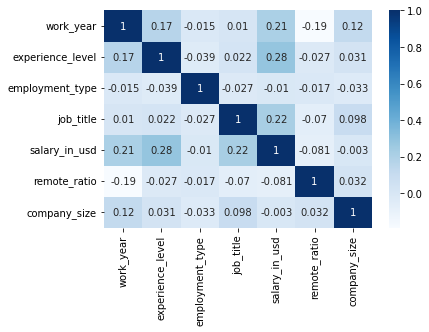

In [87]:
sns.heatmap(correlation, cmap = 'Blues',annot = True);

## Split

In [88]:
# split dataset into dependent and independent variables
X= data.drop('salary_in_usd', axis = 1)     #independent variable
y= data['salary_in_usd']   # dependent variable
print('shape of X(independent variables):{}'.format(X.shape))
print('shape of y(dependent variable):{}'.format(y.shape))

shape of X(independent variables):(7452, 6)
shape of y(dependent variable):(7452,)


In [89]:
X.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'remote_ratio', 'company_size'],
      dtype='object')

In [90]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6706, 6)
y_train shape: (6706,)
X_test shape: (746, 6)
y_test shape: (746,)


# Model building

In [91]:
max_depth = [None,2,4,6,8,10,12]
parameters= {"max_depth":max_depth}
regressor=DecisionTreeRegressor(random_state=42)
gs=GridSearchCV(regressor, parameters, scoring="neg_mean_squared_error")
gs.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [92]:
best_params= gs.best_params_
best_params

{'max_depth': None}

In [93]:
# creating a new model with best params
model_r = DecisionTreeRegressor(random_state = 42, **best_params)
model_r.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

## Evaluation of Model

In [94]:
y_pred= model_r.predict(X_train)

In [95]:
y_predt = model_r.predict(X_test)

In [96]:
mae =  mean_absolute_error(y_train,y_pred)
print(f"The mean absolute error for the training data is: {round(mae,2)}")

The mean absolute error for the training data is: 36165.92


In [97]:
mae = mean_absolute_error(y_test,y_predt)
print(f"The mean absolute error of the Testing dataset is :  {round(mae,2)}")

The mean absolute error of the Testing dataset is :  41636.12


In [98]:
p = np.array([[2020, "MI", "FT", "Data Scientist", 100, "L"]])
p

array([['2020', 'MI', 'FT', 'Data Scientist', '100', 'L']], dtype='<U14')

In [99]:
p[:, 1]=le_expl.transform(p[:, 1])
p[:, 2]=le_empt.transform(p[:, 2])
p[:, 3]=le_jobtitle.transform(p[:, 3])
p[:, 5]=le_compz.transform(p[:, 5])
p=p.astype(float)
p


array([[2.02e+03, 2.00e+00, 2.00e+00, 1.80e+01, 1.00e+02, 0.00e+00]])

In [100]:
y_predictor=model_r.predict(p)
y_predictor

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([105000.])

## Communication of Result

In [101]:
index_list = X_train.columns.tolist()
index_list

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'remote_ratio',
 'company_size']

In [102]:
# Feature importance
feat_imp = model_r.feature_importances_.tolist()
feat_imp

[0.08010401255148196,
 0.33565330217762274,
 0.004828987708181509,
 0.4610115340569264,
 0.06039087524827046,
 0.05801128825751697]

In [103]:
# feature importance dataframe
df_feat_imp = pd.DataFrame({'feature importance': feat_imp}, index=index_list)
df_feat_imp

,feature importance
work_year,0.080104
experience_level,0.335653
employment_type,0.004829
job_title,0.461012
remote_ratio,0.060391
company_size,0.058011


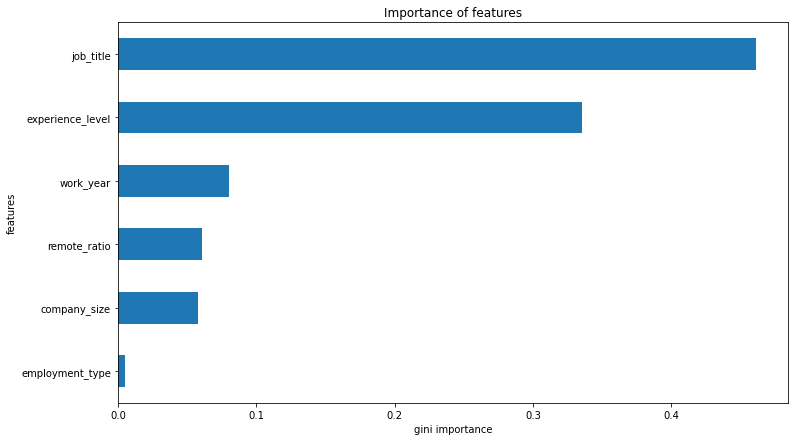

In [104]:
fig, ax = plt.subplots(1,1, figsize= (12, 7))
df_feat_imp.sort_values(by = 'feature importance', ascending=True).plot.barh(legend = False, ax=ax);
# label axis
plt.xlabel('gini importance')
plt.ylabel('features')
plt.title('Importance of features');

#### This observation suggests that job title is the most significant predictor of salary in the model, indicating that different job roles have a substantial impact on determining compensation levels. Conversely, employment type appears to have the least influence, implying that the nature of employment (e.g., full-time, part-time, contract) has relatively less bearing on salary predictions compared to other factors such as job title, experience level, or company attributes.

## Saving the Model

In [105]:
import pickle

In [106]:
df = {"model":model_r, "le_expl":le_expl, "le_empt":le_empt, "le_jobtitle":le_jobtitle, "le_compz":le_compz}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(df, file)

In [107]:
with open('saved_steps.pkl', 'rb') as file:
    df = pickle.load(file)
model_loaded = df['model']
le_expl = df['le_expl']
le_empt = df['le_empt']
le_jobtitle = df['le_jobtitle']
le_compz = df['le_compz']

In [108]:
y_predict=model_loaded.predict(p)
y_predict

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([105000.])